# Download Set and Plot

In [3]:
import numpy as np
import pandas as pd

import pickle
import gzip

filename = "RML2016.10a_dict.pkl"
with open(filename, 'rb') as file:
    dataSet = pickle.load(file, encoding='bytes')

import pprint
keyList = list(dataSet.keys())
pprint.pprint(keyList)

[(b'QPSK', 2),
 (b'PAM4', 8),
 (b'AM-DSB', -4),
 (b'GFSK', 6),
 (b'QAM64', 8),
 (b'AM-SSB', 12),
 (b'8PSK', 8),
 (b'8PSK', 12),
 (b'QAM64', -6),
 (b'QAM16', 2),
 (b'QAM16', -20),
 (b'PAM4', -6),
 (b'WBFM', -18),
 (b'AM-DSB', 16),
 (b'CPFSK', 10),
 (b'WBFM', 6),
 (b'BPSK', 4),
 (b'BPSK', -2),
 (b'QPSK', -20),
 (b'CPFSK', -8),
 (b'AM-SSB', 6),
 (b'QAM64', -20),
 (b'QAM16', 12),
 (b'GFSK', -20),
 (b'AM-SSB', -12),
 (b'CPFSK', 0),
 (b'AM-DSB', 6),
 (b'BPSK', -16),
 (b'QPSK', -6),
 (b'8PSK', -12),
 (b'CPFSK', -18),
 (b'BPSK', -10),
 (b'QPSK', 8),
 (b'PAM4', 14),
 (b'AM-DSB', -10),
 (b'GFSK', 12),
 (b'QAM64', 2),
 (b'WBFM', -4),
 (b'AM-SSB', -18),
 (b'QAM64', -4),
 (b'GFSK', -4),
 (b'AM-DSB', 8),
 (b'PAM4', -16),
 (b'QPSK', -16),
 (b'BPSK', 16),
 (b'8PSK', -8),
 (b'CPFSK', 16),
 (b'WBFM', 0),
 (b'QPSK', 6),
 (b'BPSK', 14),
 (b'AM-DSB', -8),
 (b'GFSK', -10),
 (b'CPFSK', -2),
 (b'AM-SSB', 8),
 (b'GFSK', 18),
 (b'QAM16', 6),
 (b'QAM16', -16),
 (b'QAM64', 18),
 (b'AM-SSB', -2),
 (b'CPFSK', 6),
 

In [4]:
def plotTimeDomain(snr, offset):
    fig, ax = plt.subplots(figsize=(11,11))
    
    for i, mod in enumerate(modTypes):
        I = dataSet[(mod, snr)][offset][0]
        Q = dataSet[(mod, snr)][offset][1]
        ax = fig.add_subplot(4,3,i+1)
        plt.plot(I)
        plt.plot(Q)
        plt.title(mod)
        plt.tight_layout()
    plt.show()

C:\Users\juanc\AppData\Local\Temp\ipykernel_7572\291760231.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


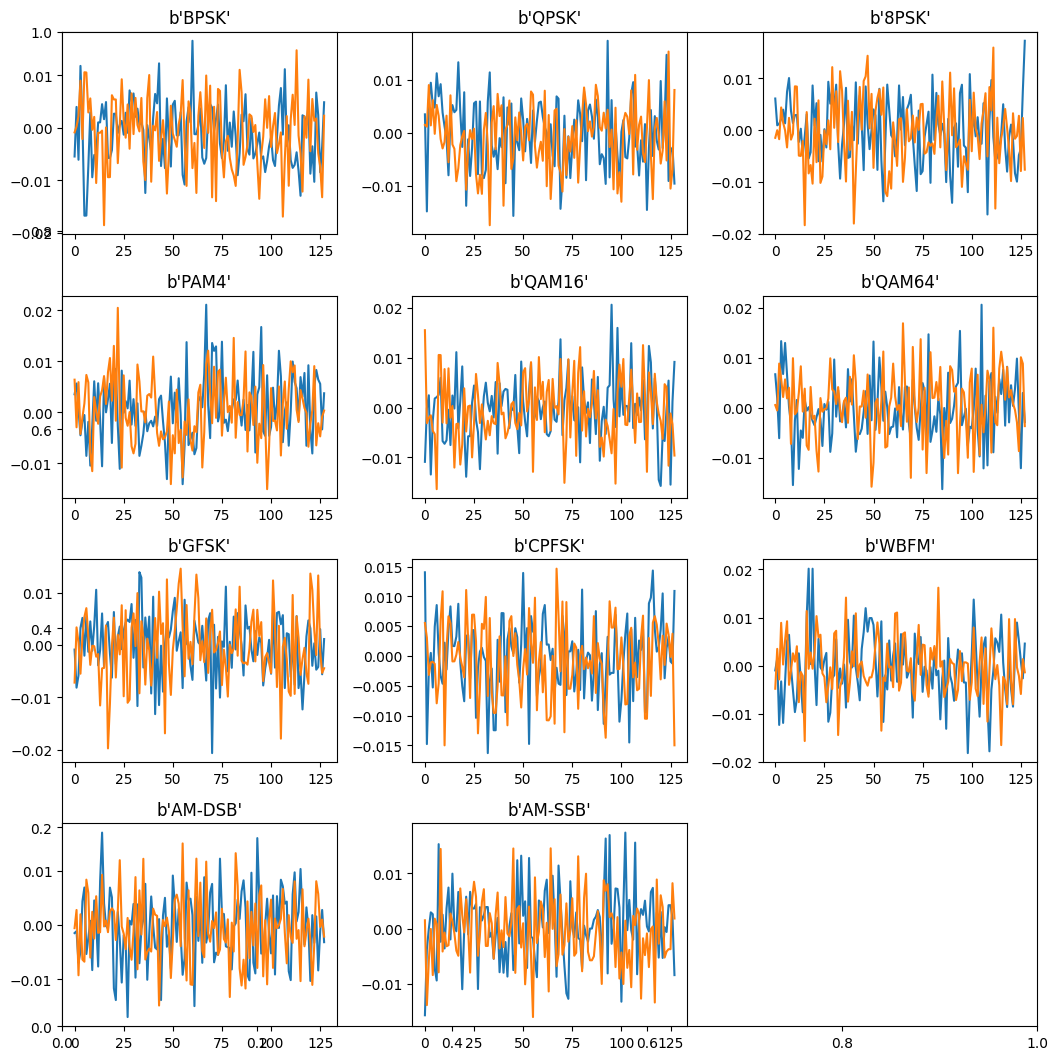

In [45]:
import matplotlib.pyplot as plt

modTypes = [b'BPSK', b'QPSK', b'8PSK', b'PAM4', b'QAM16', b'QAM64', b'GFSK', b'CPFSK', b'WBFM', b'AM-DSB', b'AM-SSB'] 
plotTimeDomain(-20, 100)

# Prepare Dataset

In [8]:
labels = list()
dataTemp = []

for k in keyList:
    dataTemp.append(dataSet[k])
    for i in range(dataSet[k].shape[0]):
        labels.append(k)

labels = np.array(labels)
dataTemp = np.vstack(dataTemp)


data = dataTemp[:,0], dataTemp[:, 1]
data = np.stack(data, axis = 1)

print(data.shape)
print(labels.shape)



(220000, 2, 128)
(220000, 2)


In [9]:
inputShape = data[0].shape
outputShape = tuple([1]) + inputShape

In [12]:


np.random.seed(65465)
n = labels.shape[0]

x = np.random.choice(range(n), n, replace=False)

a = int(np.floor(n/2))

train = x[:a]
test = x[a:]

print(n)

220000


In [13]:
from sklearn.preprocessing import LabelBinarizer as LB

xTrain = data[train]
xTest = data[test]

print(xTrain.shape)

yTrain = LB().fit_transform(labels[train][:,0])
yTest = LB().fit_transform(labels[test][:,0])

snrTrain = labels[train][:,1].astype(int)
snrTest = labels[test][:,1].astype(int)

(110000, 2, 128)


# Keras Import

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, ZeroPadding2D, GlobalMaxPooling2D
from keras.optimizers import Adam

# Model 1 - Dense From Paper

In [15]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=inputShape))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Flatten())
model1.add(Dense(11, activation='softmax'))

model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2, 128)            16512     
                                                                 
 dense_1 (Dense)             (None, 2, 256)            33024     
                                                                 
 dense_2 (Dense)             (None, 2, 128)            32896     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 11)                2827      
                                                                 
Total params: 85259 (333.04 KB)
Trainable params: 85259 (333.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model 2 - Dense Using Sigmoid

In [16]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=inputShape))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Flatten())
model2.add(Dense(11, activation='sigmoid'))

model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2, 128)            16512     
                                                                 
 dense_5 (Dense)             (None, 2, 1024)           132096    
                                                                 
 dense_6 (Dense)             (None, 2, 512)            524800    
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 11)                11275     
                                                                 
Total params: 684683 (2.61 MB)
Trainable params: 684683 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model 3 - Dense Using Tanh

In [17]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=inputShape))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Flatten())
model3.add(Dense(11, activation='tanh'))

model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2, 128)            16512     
                                                                 
 dense_9 (Dense)             (None, 2, 1024)           132096    
                                                                 
 dense_10 (Dense)            (None, 2, 512)            524800    
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 11)                11275     
                                                                 
Total params: 684683 (2.61 MB)
Trainable params: 684683 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model 4 - Dense Selu

In [18]:
model4 = Sequential()
model4.add(Dense(128, activation='selu', input_shape=inputShape))
model4.add(Dense(1024, activation='selu'))
model4.add(Dense(512, activation='selu'))
model4.add(Flatten())
model4.add(Dense(11, activation='softmax'))

model4.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2, 128)            16512     
                                                                 
 dense_13 (Dense)            (None, 2, 1024)           132096    
                                                                 
 dense_14 (Dense)            (None, 2, 512)            524800    
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 11)                11275     
                                                                 
Total params: 684683 (2.61 MB)
Trainable params: 684683 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model 5 - Dense elu

In [19]:
model5 = Sequential()
model5.add(Dense(128, activation='elu', input_shape=inputShape))
model5.add(Dense(1024, activation='elu'))
model5.add(Dense(512, activation='elu'))
model5.add(Flatten())
model5.add(Dense(11, activation='softmax'))

model5.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2, 128)            16512     
                                                                 
 dense_17 (Dense)            (None, 2, 1024)           132096    
                                                                 
 dense_18 (Dense)            (None, 2, 512)            524800    
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 11)                11275     
                                                                 
Total params: 684683 (2.61 MB)
Trainable params: 684683 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model 6 - Dense ReLu learning rate = 0.002

In [20]:
model6 = Sequential()
model6.add(Dense(128, activation='relu', input_shape=inputShape))
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Flatten())
model6.add(Dense(11, activation='softmax'))

model6.compile(optimizer=Adam(learning_rate=0.002), loss = 'categorical_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2, 128)            16512     
                                                                 
 dense_21 (Dense)            (None, 2, 1024)           132096    
                                                                 
 dense_22 (Dense)            (None, 2, 512)            524800    
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_23 (Dense)            (None, 11)                11275     
                                                                 
Total params: 684683 (2.61 MB)
Trainable params: 684683 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train Dense Models

In [ ]:
history1 = model1.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=1, batch_size=2048)

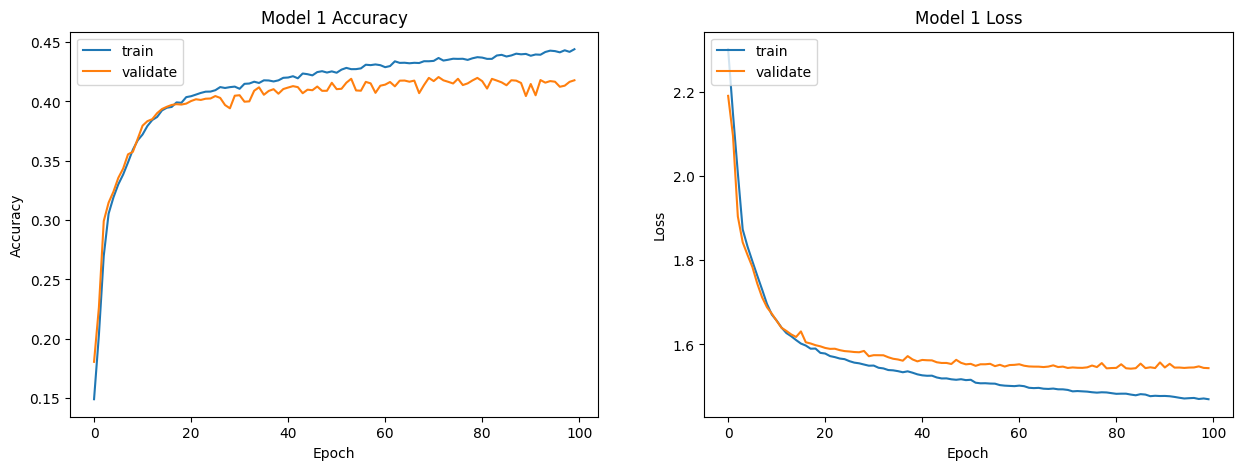

In [111]:
plotHistoryObject(history1, 'Model 1')

In [22]:

history2 = model2.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print('done')
#history3 = model3.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print('done')
history4 = model4.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print('done')
history5 = model5.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print('done')
history6 = model6.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), verbose=0, batch_size=2048)

done
done
done
done


# Plot Data

In [48]:
def plotHistoryObject(history, modelname):
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title(modelname + ' Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title(modelname + ' Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.savefig(modelname+".png")
    plt.show()

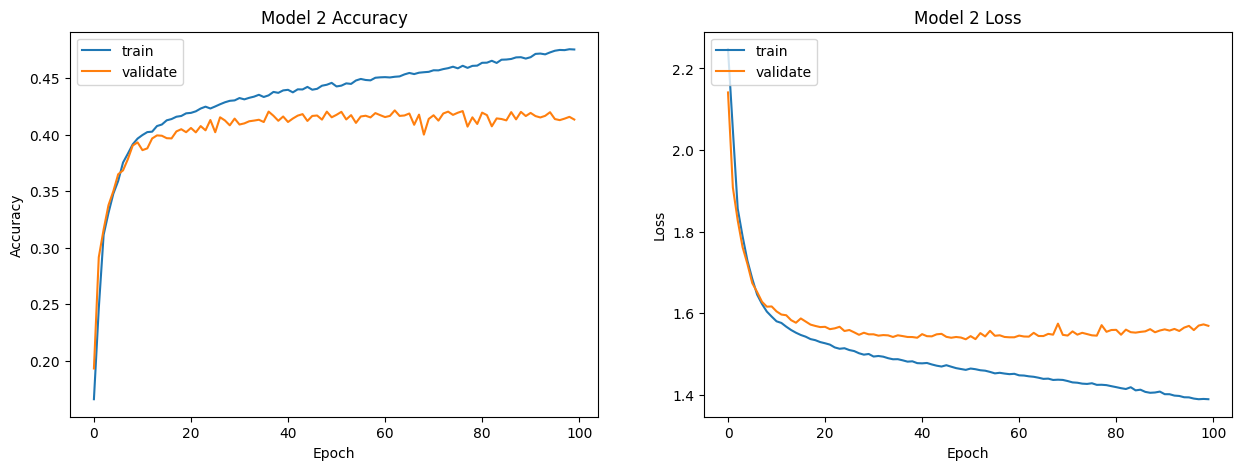

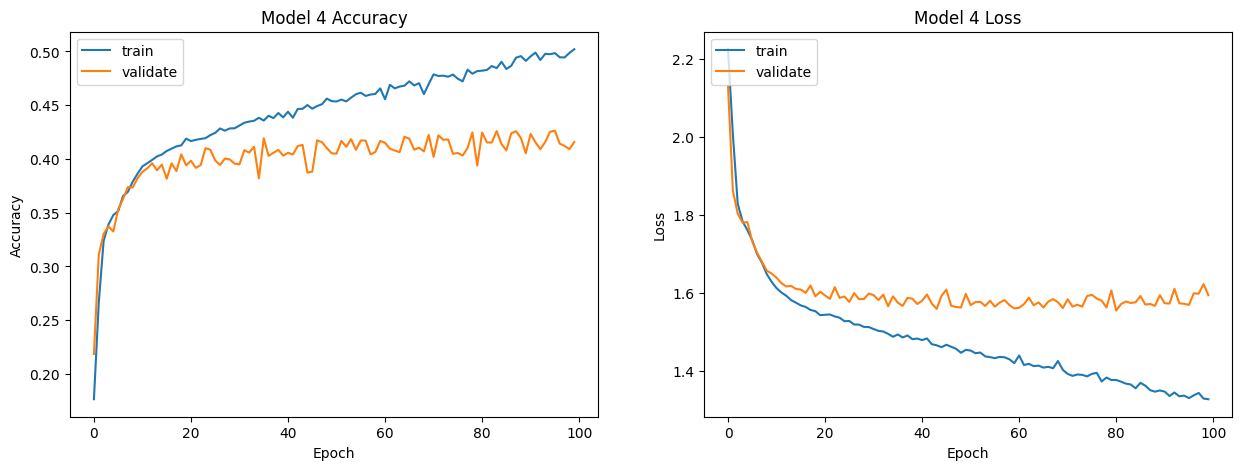

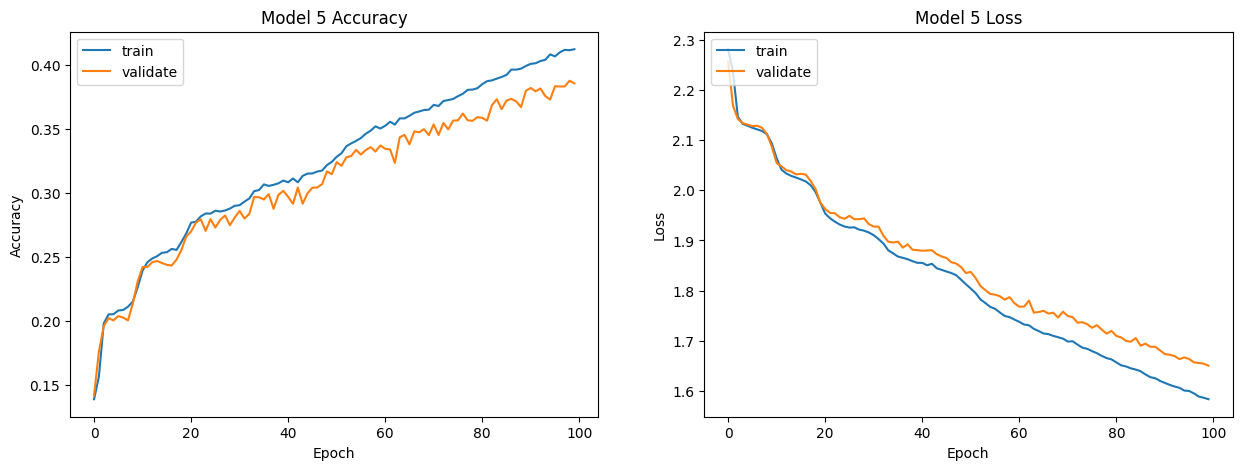

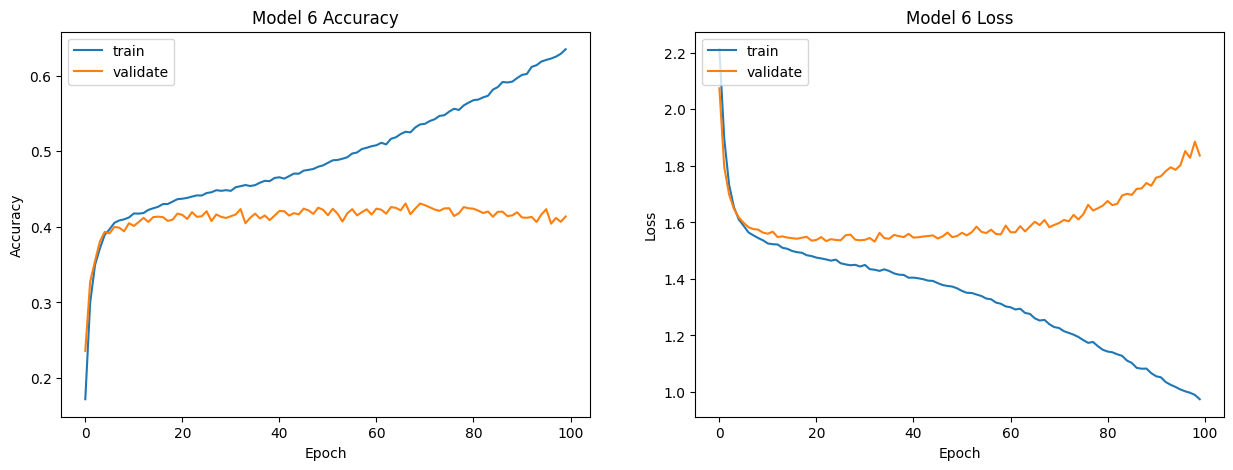

In [49]:

plotHistoryObject(history2, 'Model 2')
plotHistoryObject(history4, 'Model 4')
plotHistoryObject(history5, 'Model 5')
plotHistoryObject(history6, 'Model 6')

# Get Accuracy Based on SNR

In [35]:
def getSNRAccuracy(yPred, yTrue):
    x = list()
    y = list()

    for i in snrList:
        index = np.nonzero(snrTest == i)
        x.append(i)
        temp = accuracy_score(np.argmax(yTrue[index], axis=1), np.argmax(yPred[index], axis=1))
        y.append(temp)

    return x, y

In [ ]:
from sklearn.metrics import accuracy_score

#sort keyList by SNR


model2Pred = model2.predict(xTest)
model4Pred = model2.predict(xTest)
model5Pred = model2.predict(xTest)
model6Pred = model2.predict(xTest)








In [36]:
snrList = [k[1] for k in keyList]
snrList = np.sort(np.unique(snrList))

print(snrList)


x2, y2 = getSNRAccuracy(model2Pred, yTest)
x4, y4 = getSNRAccuracy(model4Pred, yTest)
x5, y5 = getSNRAccuracy(model5Pred, yTest)
x6, y6 = getSNRAccuracy(model6Pred, yTest)

[-20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14
  16  18]


C:\Users\juanc\AppData\Local\Temp\ipykernel_7572\4261585484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\juanc\AppData\Local\Temp\ipykernel_7572\4261585484.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\juanc\AppData\Local\Temp\ipykernel_7572\4261585484.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


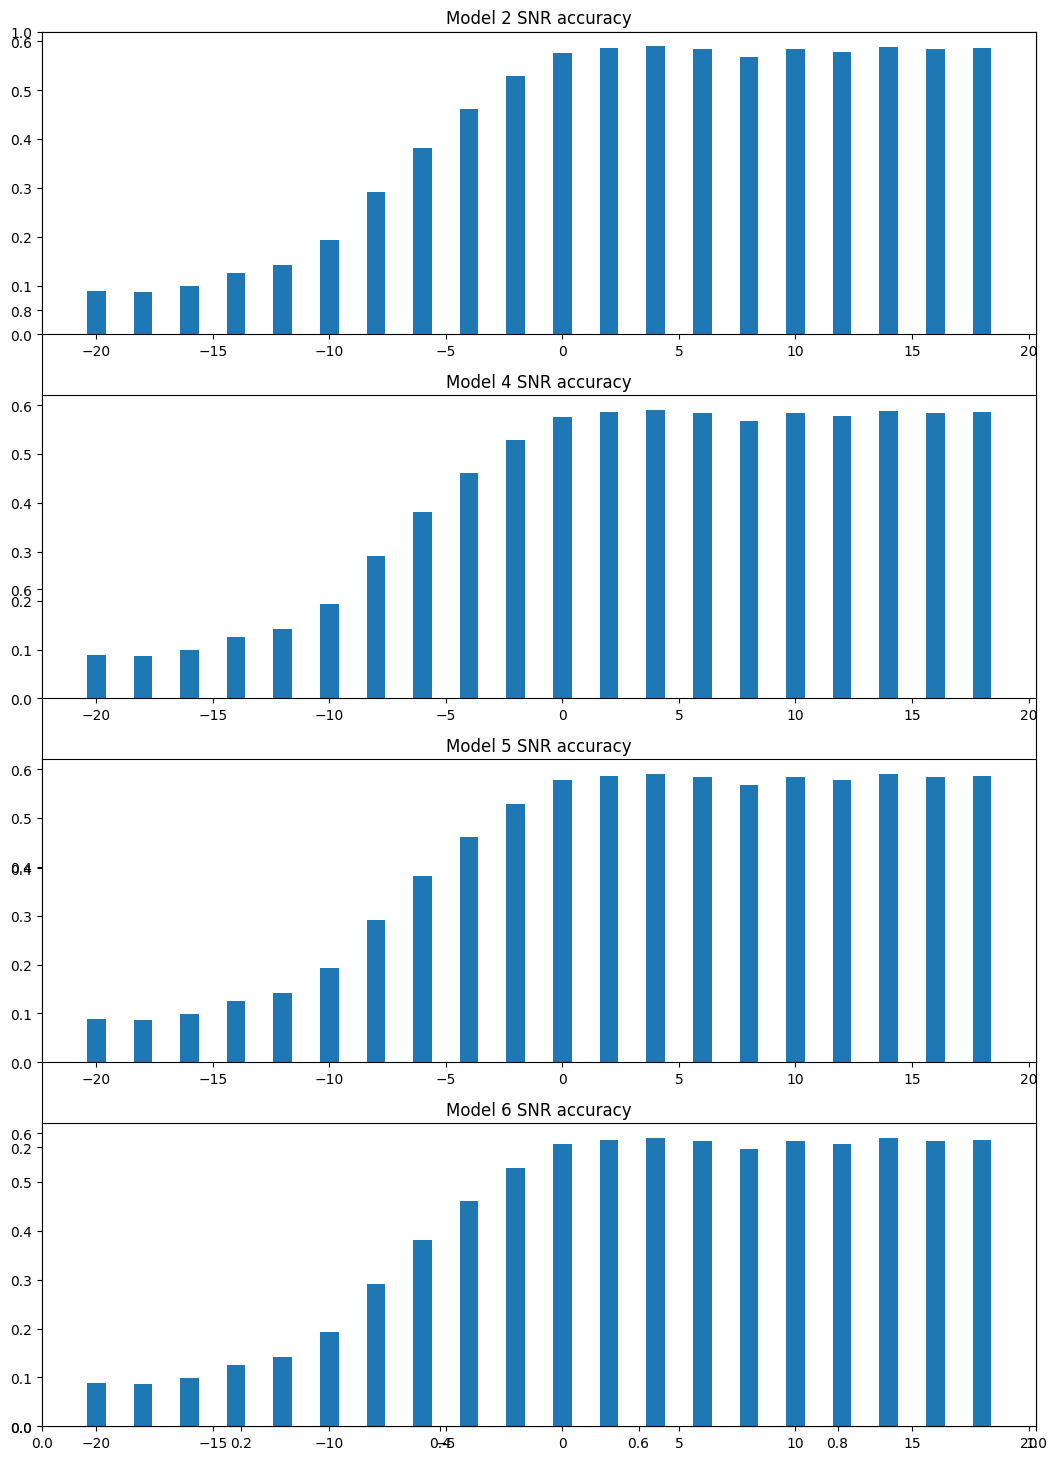

In [44]:
fig, ax = plt.subplots(figsize=(11,15))
ax = fig.add_subplot(4,1,1)
plt.bar(x2, y2)
plt.title("Model 2 SNR accuracy")
plt.tight_layout()
ax = fig.add_subplot(4,1,2)
plt.bar(x4, y4)
plt.tight_layout()
plt.title("Model 4 SNR accuracy")
ax = fig.add_subplot(4,1,3)
plt.bar(x5, y5)
plt.tight_layout()
plt.title("Model 5 SNR accuracy")
ax = fig.add_subplot(4,1,4)
plt.bar(x6, y6)
plt.tight_layout()
plt.title("Model 6 SNR accuracy")
plt.show()

# Model 8 - Convolutional from paper

In [90]:
model8 = Sequential()

model8.add(Reshape((2,128,1), input_shape = inputShape))
model8.add(ZeroPadding2D((0, 2), data_format = 'channels_last', input_shape = inputShape))
model8.add(Conv2D(256, (1, 3), input_shape=inputShape, padding = 'valid', activation = "relu", name="conv1", kernel_initializer='glorot_uniform', data_format="channels_last"))
model8.add(Dropout(0.5))
model8.add(ZeroPadding2D((0,2), data_format = 'channels_last'))
model8.add(Conv2D(80, (2, 3), activation="relu", name="conv3", padding="valid", kernel_initializer="glorot_uniform", data_format="channels_last"))
model8.add(Dropout(0.5))
model8.add(Flatten())   
model8.add(Dense(256, activation="relu", name="dense1", kernel_initializer="he_normal"))
model8.add(Dropout(0.5))
model8.add(Dense(11, name="dense3", kernel_initializer="he_normal", activation = 'softmax'))

model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model8.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_52 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d_94 (ZeroPad  (None, 2, 132, 1)         0         
 ding2D)                                                         
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 256)       1024      
                                                                 
 dropout_80 (Dropout)        (None, 2, 130, 256)       0         
                                                                 
 zero_padding2d_95 (ZeroPad  (None, 2, 134, 256)       0         
 ding2D)                                                         
                                                                 
 conv3 (Conv2D)              (None, 1, 132, 80)      

# Model 9 - Convolutional Using Max Pooling

In [91]:
model9 = Sequential()
model9.add(Reshape((2,128,1), input_shape = inputShape))
model9.add(ZeroPadding2D((0, 2), data_format = 'channels_last'))
model9.add(Conv2D(256, (1, 3), activation = "relu", name="conv1", data_format = 'channels_last'))
model9.add(MaxPooling2D(pool_size= (2,1)))
model9.add(Dropout(0.5))
model9.add(ZeroPadding2D((0,2), data_format = 'channels_last'))
model9.add(Conv2D(64, (3, 3), activation="relu", name="conv3", data_format = 'channels_last', padding='same'))
model9.add(GlobalMaxPooling2D())
model9.add(Dropout(0.5))
model9.add(Flatten())
model9.add(Dense(128, activation="relu", name="dense1", kernel_initializer="he_normal"))   
model9.add(Dense(256, activation="relu", name="dense2", kernel_initializer="he_normal"))
model9.add(Dropout(0.5))
model9.add(Dense(11, name="dense3", kernel_initializer="he_normal", activation = 'softmax'))

model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model9.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_53 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d_96 (ZeroPad  (None, 2, 132, 1)         0         
 ding2D)                                                         
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 256)       1024      
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 1, 130, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_83 (Dropout)        (None, 1, 130, 256)       0         
                                                                 
 zero_padding2d_97 (ZeroPad  (None, 1, 134, 256)     

# Model 10 - Convolutional Learning Rate 0.002

In [92]:
model10 = Sequential()
model10.add(Reshape((2,128,1), input_shape = inputShape))
model10.add(ZeroPadding2D((0, 2), data_format = 'channels_last'))
model10.add(Conv2D(256, (1, 3), activation = "relu", name="conv1", data_format = 'channels_last'))
model10.add(MaxPooling2D(pool_size= (2,1)))
model10.add(Dropout(0.5))
model10.add(ZeroPadding2D((0,2), data_format = 'channels_last'))
model10.add(Conv2D(64, (3, 3), activation="relu", name="conv3", data_format = 'channels_last', padding='same'))
model10.add(GlobalMaxPooling2D())
model10.add(Dropout(0.5))
model10.add(Flatten())
model10.add(Dense(128, activation="relu", name="dense1", kernel_initializer="he_normal"))   
model10.add(Dense(256, activation="relu", name="dense2", kernel_initializer="he_normal"))
model10.add(Dropout(0.5))
model10.add(Dense(11, name="dense3", kernel_initializer="he_normal", activation = 'softmax'))

model10.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.002), metrics = ['accuracy'])
model10.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_54 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d_98 (ZeroPad  (None, 2, 132, 1)         0         
 ding2D)                                                         
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 256)       1024      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 1, 130, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_86 (Dropout)        (None, 1, 130, 256)       0         
                                                                 
 zero_padding2d_99 (ZeroPad  (None, 1, 134, 256)     

# Model 11 - Convolutional Learning Rate 0.003

In [93]:
model11 = Sequential()
model11.add(Reshape((2,128,1), input_shape = inputShape))
model11.add(ZeroPadding2D((0, 2), data_format = 'channels_last'))
model11.add(Conv2D(256, (1, 3), activation = "relu", name="conv1", data_format = 'channels_last'))
model11.add(MaxPooling2D(pool_size= (2,1)))
model11.add(Dropout(0.5))
model11.add(ZeroPadding2D((0,2), data_format = 'channels_last'))
model11.add(Conv2D(64, (3, 3), activation="relu", name="conv3", data_format = 'channels_last', padding='same'))
model11.add(GlobalMaxPooling2D())
model11.add(Dropout(0.5))
model11.add(Flatten())
model11.add(Dense(128, activation="relu", name="dense1", kernel_initializer="he_normal"))   
model11.add(Dense(256, activation="relu", name="dense2", kernel_initializer="he_normal"))
model11.add(Dropout(0.5))
model11.add(Dense(11, name="dense3", kernel_initializer="he_normal", activation = 'softmax'))

model11.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.003), metrics = ['accuracy'])
model11.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_55 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d_100 (ZeroPa  (None, 2, 132, 1)         0         
 dding2D)                                                        
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 256)       1024      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 1, 130, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_89 (Dropout)        (None, 1, 130, 256)       0         
                                                                 
 zero_padding2d_101 (ZeroPa  (None, 1, 134, 256)     

# Train Convolutional Models

In [94]:
history8 = model8.fit(xTrain, yTrain, epochs=70, validation_data=(xTest, yTest), verbose=0, batch_size=1024)
print("model 8 done")
history9 = model9.fit(xTrain, yTrain, epochs=70, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print("model 9 done")
history10 = model10.fit(xTrain, yTrain, epochs=70, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print("model 10 done")
history11 = model11.fit(xTrain, yTrain, epochs=70, validation_data=(xTest, yTest), verbose=0, batch_size=2048)
print("model 11 done")

model 8 done
model 9 done
model 10 done
model 11 done


# Plot Data

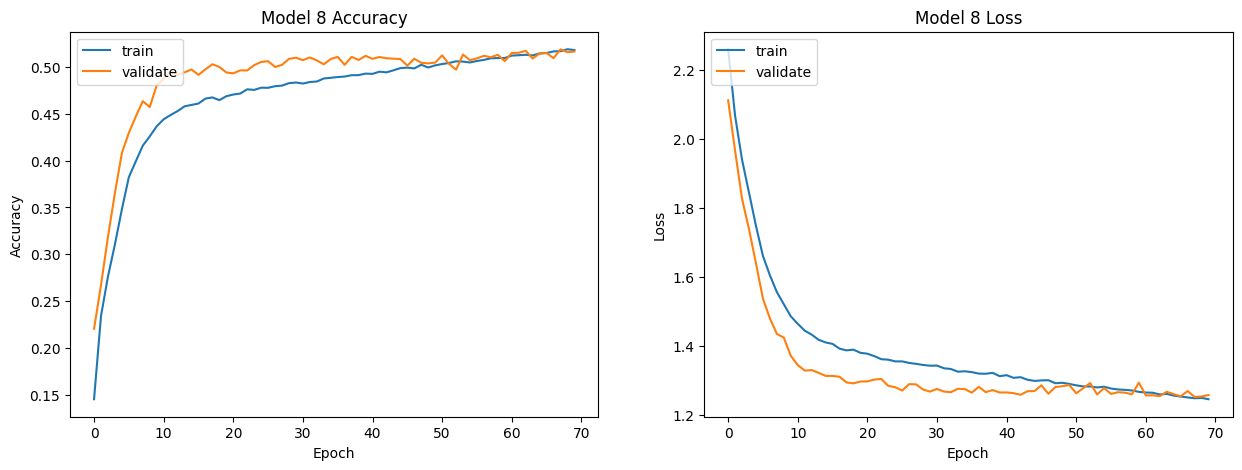

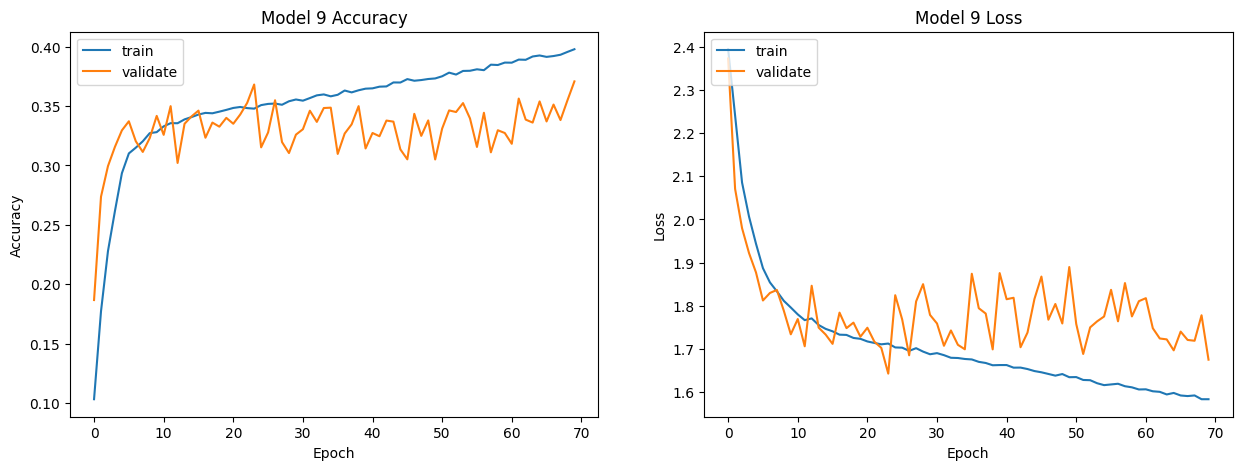

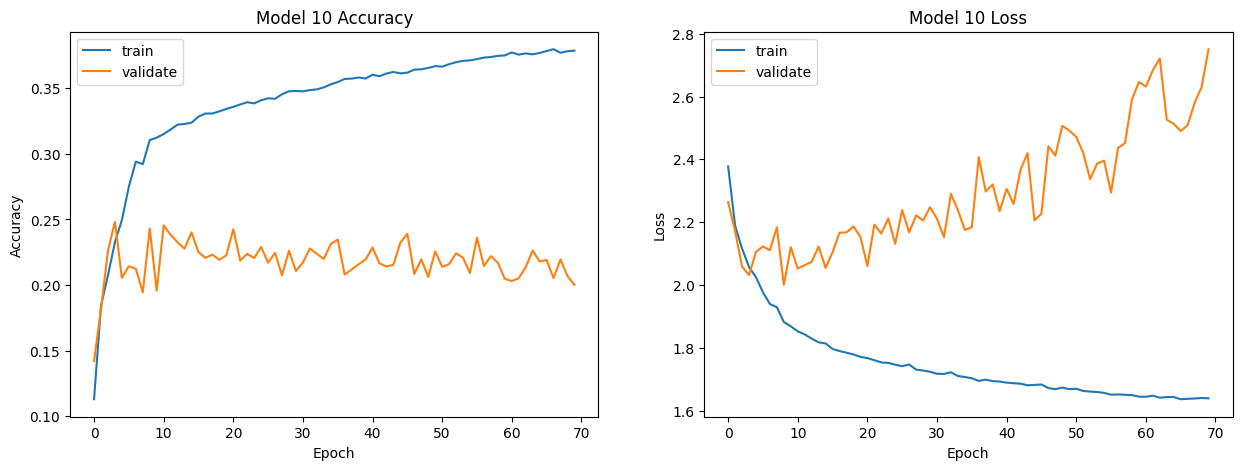

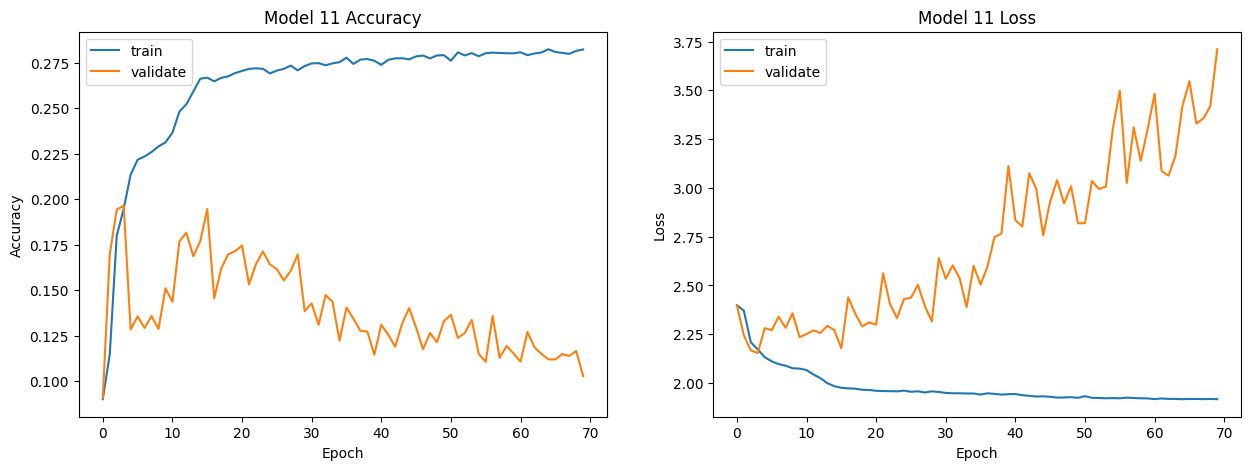

In [95]:
plotHistoryObject(history8, 'Model 8')
plotHistoryObject(history9, 'Model 9')
plotHistoryObject(history10, 'Model 10')
plotHistoryObject(history11, 'Model 11')